In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:/Users/sheth/Downloads/heart.csv')

### Data Exploration.

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
for i in df.columns:
    print(i, ':-')
    print(df[i].value_counts(dropna=False))
    print('------*-------')

Age :-
54    51
58    42
55    41
57    38
56    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
43    24
46    24
41    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
32     5
71     5
72     4
75     3
29     3
76     2
77     2
33     2
31     2
73     1
30     1
28     1
Name: Age, dtype: int64
------*-------
Sex :-
M    725
F    193
Name: Sex, dtype: int64
------*-------
ChestPainType :-
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------*-------
RestingBP :-
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
117      1
127      1
129      1
0        1
Name: RestingBP, Length: 67, dtype: int64
------*-------
Cholesterol :-
0      172
254     11
223     10
220     10
211      9
      ... 
117      1
123      1
131      1
293      1
603      1
Nam

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Data Visualization

In [11]:
import seaborn as sns

In [12]:
corr=df.corr()

<AxesSubplot:>

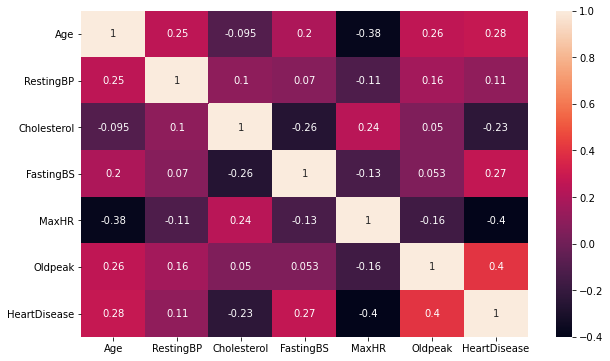

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

(array([410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

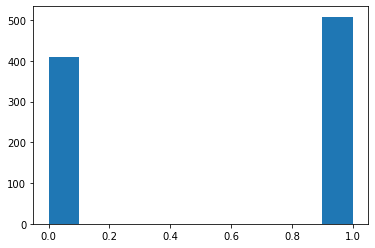

In [14]:
plt.hist(df['HeartDisease'])

In [15]:
df_class=df[:]

In [16]:
df_class.HeartDisease.astype('float')

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
913    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: HeartDisease, Length: 918, dtype: float64

In [17]:
df_cat=df_class[df_class.select_dtypes(include=['object']).columns.tolist()]

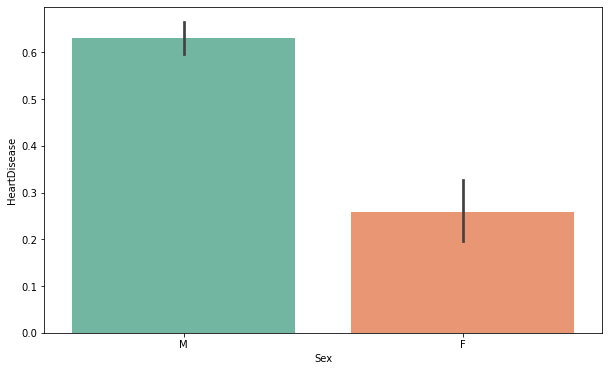

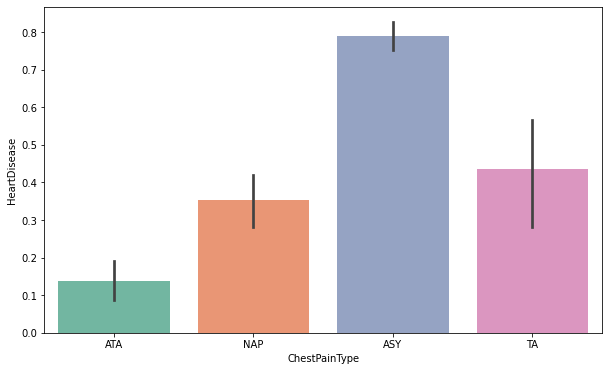

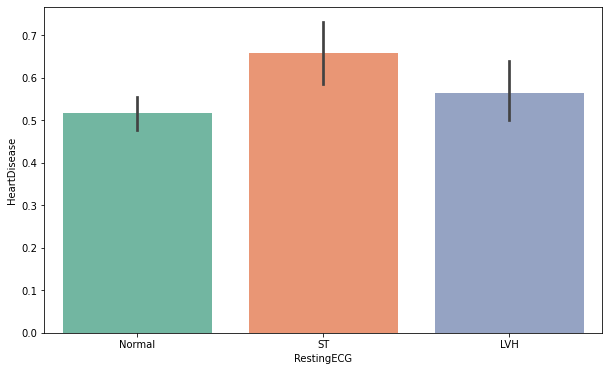

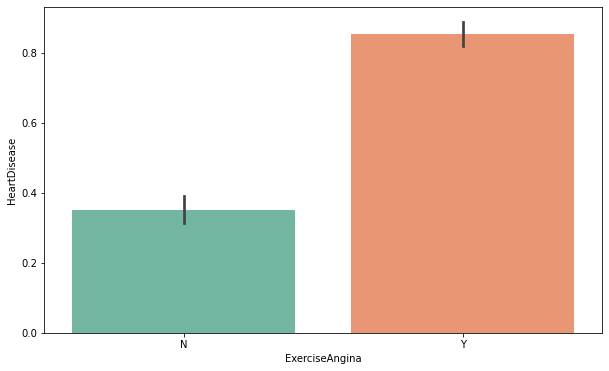

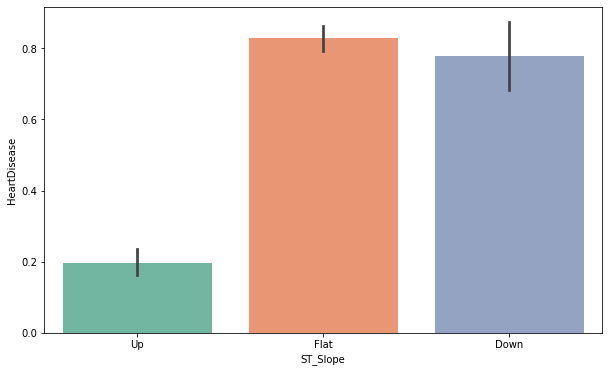

In [18]:
for variables in df_cat:
    plt.figure(figsize=(10,6))
    sns.barplot(variables,'HeartDisease', data=df_class, palette='Set2') 

### Data Pre-Processing

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
New_Stats = df
data = pd.get_dummies(New_Stats["Sex"])

In [21]:
data.head(5)

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [22]:
New_Stats.drop('Sex', axis='columns')

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Label Encoding

In [23]:
le = LabelEncoder()
label_Sex = le.fit_transform(df["Sex"])
label_ChestPainType = le.fit_transform(df["ChestPainType"])
label_RestingECG = le.fit_transform(df["RestingECG"])
label_ExerciseAngina = le.fit_transform(df["ExerciseAngina"])
label_STSlope = le.fit_transform(df["ST_Slope"])

In [24]:
le.classes_

array(['Down', 'Flat', 'Up'], dtype=object)

In [25]:
data = df.drop("Sex", axis='columns')
data["Sex"] = label_Sex 
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [26]:
data = data.drop("ChestPainType", axis='columns')
data["ChestPainType"] = label_ChestPainType
data.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex,ChestPainType
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,2
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,2


In [27]:
data = data.drop("RestingECG", axis='columns')
data["RestingECG"] = label_RestingECG
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex,ChestPainType,RestingECG
0,40,140,289,0,172,N,0.0,Up,0,1,1,1
1,49,160,180,0,156,N,1.0,Flat,1,0,2,1
2,37,130,283,0,98,N,0.0,Up,0,1,1,2
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,1
4,54,150,195,0,122,N,0.0,Up,0,1,2,1


In [28]:
data = data.drop("ExerciseAngina", axis='columns')
data["ExerciseAngina"] = label_RestingECG
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina
0,40,140,289,0,172,0.0,Up,0,1,1,1,1
1,49,160,180,0,156,1.0,Flat,1,0,2,1,1
2,37,130,283,0,98,0.0,Up,0,1,1,2,2
3,48,138,214,0,108,1.5,Flat,1,0,0,1,1
4,54,150,195,0,122,0.0,Up,0,1,2,1,1


In [29]:
data = data.drop("ST_Slope", axis='columns')
data["ST_Slope"] = label_STSlope
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,1,2
1,49,160,180,0,156,1.0,1,0,2,1,1,1
2,37,130,283,0,98,0.0,0,1,1,2,2,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,1,2


In [30]:
data = data[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']]
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,140,289,0,172,0.0,1,1,1,1,2,0
1,49,160,180,0,156,1.0,0,2,1,1,1,1
2,37,130,283,0,98,0.0,1,1,2,2,2,0
3,48,138,214,0,108,1.5,0,0,1,1,1,1
4,54,150,195,0,122,0.0,1,2,1,1,2,0


### Train_Test Data Split

In [31]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
x = data.drop(['HeartDisease'], axis=1, inplace=False)
y = data["HeartDisease"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state =5)

In [33]:
len(x_test)

184

### LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=lr.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [39]:
accuracy = accuracy_score(y_test, y_pred)

In [40]:
f1 = f1_score(y_test, y_pred, average=None)

In [41]:
precision = precision_score(y_test, y_pred, average=None)

In [42]:
recall = recall_score(y_test, y_pred, average=None)

In [43]:
print("Accuracy is:",accuracy)
print("F1 score is:",f1)
print("Precision score is:",precision)
print("Recall score is:",recall)

Accuracy is: 0.8967391304347826
F1 score is: [0.87581699 0.91162791]
Precision score is: [0.8375     0.94230769]
Recall score is: [0.91780822 0.88288288]


In [44]:
lr2=LogisticRegression(max_iter=1000)

In [45]:
lr2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred2 = lr2.predict(x_test)

In [47]:
accuracy2 = accuracy_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2, average=None)
precision2 = precision_score(y_test, y_pred2, average=None)
recall2 = recall_score(y_test, y_pred2, average=None)

In [48]:
print("Accuracy is:",accuracy2)
print("F1 score is:",f12)
print("Precision score is:",precision2)
print("Recall score is:",recall2)

Accuracy is: 0.9021739130434783
F1 score is: [0.88157895 0.91666667]
Precision score is: [0.84810127 0.94285714]
Recall score is: [0.91780822 0.89189189]


In [49]:
lr2.score(x_test,y_test)*100

90.21739130434783

Text(0, 0.5, ' ')

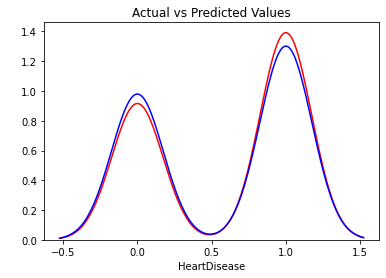

In [50]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(y_pred2, hist=False, color='b', label='Predicted Values', ax=ax1)
plt.title('Actual vs Predicted Values')
plt.ylabel(' ')

In [51]:
len(y_pred2)

184

Text(0.5, 0, 'HeartDisease')

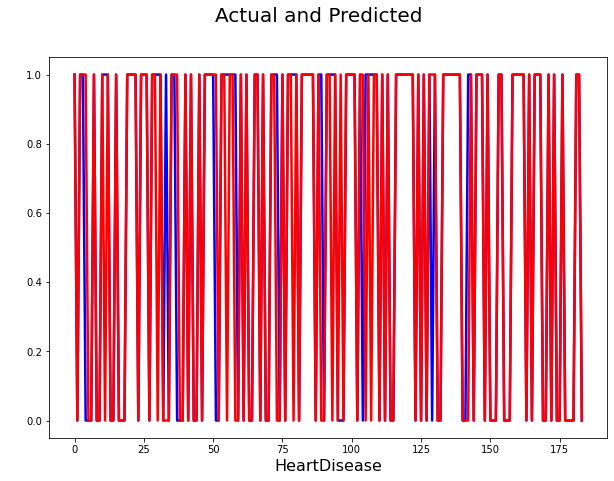

In [52]:
c = [i for i in range(184)]
fig = plt.figure(figsize=(10,7))
plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred2, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)
plt.ylabel(' ', fontsize=16)
plt.xlabel('HeartDisease', fontsize=16)

### Confusion Matrix 

[[67  6]
 [12 99]]


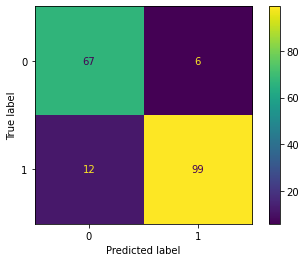

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred2)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = lr2.classes_)
disp.plot()
plt.show()

### Result :-
#### A. In the Tests done above, we find most accurate results with our 2nd model which is 90.21% accurate (Logistic Regression)
#### B. From the Confusion Matrix the data we can infer is:
1. True-Positives: 99.
2. True-Negative: 67.
3. False-Positives: 6.
4. False-Negative: 12.

# X-X-X-X-X